This notebook purpose is to predict long or short hair based on given input.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow.keras as tfk
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import BatchNormalization,Conv2D, MaxPool2D, Activation, Flatten, Dropout, Dense,Input
import cv2 as ocv
from sklearn.metrics import confusion_matrix,accuracy_score
import os

In [ ]:
paths = ['short_hair','long_hair']
x=0
data =pd.DataFrame(columns=['image','hair']) #creating dataframe
for i in range(len(paths)):
    base = 'hair_seperation\\'+paths[i]
    for j in os.listdir(base):
        image = Image.open(base+'/'+j)
        image = image.convert('L')
        image = image.resize((110,110))
        image = np.array(image).astype(np.float32)/255.0
        data.loc[x] = [image,i] # storing image and hair class
        x += 1


In [ ]:
for i in range(10):
    data = data.sample(frac=1).reset_index(drop=True) #shuffling data for 10 times
data.head()

,image,hair
0,"[[0.5137255, 0.54509807, 0.6, 0.69411767, 0.73...",1
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
2,"[[0.8784314, 0.8784314, 0.8784314, 0.8784314, ...",1
3,"[[0.45882353, 0.46666667, 0.46666667, 0.466666...",0
4,"[[0.25882354, 0.27058825, 0.26666668, 0.258823...",0


Text(0.5, 1.0, '1')

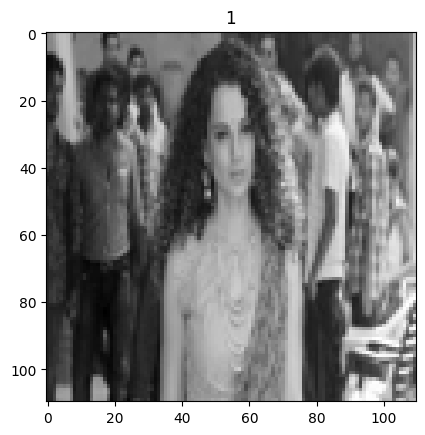

In [4]:
plt.imshow(data['image'][0],cmap='gray')
plt.title(data['hair'][0])

In [ ]:
x = np.concatenate(data['image'].__array__()) # Extracting image from dataframe
x = x.reshape(-1,110,110,1)
x.shape

(2931, 110, 110, 1)

In [6]:
y = data['hair'].__array__()
y.shape

(2931,)

In [ ]:
htrain,htest,ltrain,ltest = train_test_split(x,y,test_size=0.3,random_state=1255,stratify=y) #splitting data for training and testing using stratify parameter
htrain.shape,htest.shape,ltrain.shape,ltest.shape


((2051, 110, 110, 1), (880, 110, 110, 1), (2051,), (880,))

In [ ]:
def mode(input_size):
    input = tfk.Input(input_size)
    con = Conv2D(9,(3,3),activation='relu',padding='same')(input)
    batch = BatchNormalization()(con)
    pool = MaxPool2D((2,2))(batch)
    
    
    con = Conv2D(35,(3,3),activation='relu',padding='same')(pool)
    batch = BatchNormalization()(con)
    pool = MaxPool2D((2,2))(batch)
    
    con = Conv2D(95,(3,3),activation='relu',padding='same')(pool)
    batch = BatchNormalization()(con)
    pool = MaxPool2D((2,2))(pool)

    flat = Flatten()(pool)
  
    dense2 =Dense(1000,activation='relu')(flat)
    drop = Dropout(0.2)(dense2)

    dense3 =Dense(500,activation='relu')(drop)
    drop = Dropout(0.2)(dense3)
    
    dense4 = Dense(200,activation='relu')(drop)
    out = Dense(1,activation='sigmoid',name='hair')(dense4)
    hmodel= tfk.Model(inputs= input,outputs=out)
    hmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return hmodel


In [9]:
hmodel = mode((110,110,1))
hmodel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 110, 110, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 110, 110, 9)    │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 110, 110, 9)    │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 9)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 35)     │         2,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 55, 55, 35)     │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5915)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     5,916,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hair (Dense)                    │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,520,037 (24.87 MB)

 Trainable params: 6,519,949 (24.87 MB)

 Non-trainable params: 88 (352.00 B)

In [ ]:
modelfile='hairDetect.keras'
checkp=ModelCheckpoint(modelfile,monitor='val_loss',
                       verbose=1,save_best_only=True,
                       save_weights_only=False,
                       mode='auto',
                       save_freq='epoch')# checkpoint for save best model
threshold=EarlyStopping(patience=20,monitor='val_loss',
                                           restore_best_weights='True',
                                           start_from_epoch=10)# threshold to stop for no improvement in model


In [ ]:
history = hmodel.fit(htrain,ltrain,
          batch_size=8,
                validation_data=(htest,ltest),
                epochs=200,
                shuffle = True,  
                steps_per_epoch=len(htrain) // 5,
                callbacks=[checkp,threshold])

hmodel.summary()

Epoch 1/200


I0000 00:00:1730818374.522112     107 service.cc:145] XLA service 0x7afbd40044e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730818374.522161     107 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730818374.522165     107 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 30/410 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5768 - loss: 3.0867

I0000 00:00:1730818380.291383     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


257/410 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7200 - loss: 1.6750

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 6.11702, saving model to hairDetect.keras
410/410 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.7430 - loss: 1.3941 - val_accuracy: 0.5682 - val_loss: 6.1170
Epoch 2/200
246/410 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8914 - loss: 0.3227
Epoch 2: val_loss improved from 6.11702 to 0.96274, saving model to hairDetect.keras
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8899 - loss: 0.3184 - val_accuracy: 0.7773 - val_loss: 0.9627
Epoch 3/200
250/410 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.2181
Epoch 3: val_loss improved from 0.96274 to 0.20205, saving model to hairDetect.keras
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9247 - loss: 0.2187 - val_accuracy: 0.9193 - val_loss: 0.2020
Epoch 4/200
251/410 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.1347
Epoch 4: val_loss did not improve from 0.20205
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9510 - loss: 0.1406 - val_accura

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 110, 110, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 110, 110, 9)    │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 110, 110, 9)    │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 9)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 35)     │         2,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 55, 55, 35)     │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5915)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     5,916,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hair (Dense)                    │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,559,937 (74.62 MB)

 Trainable params: 6,519,949 (24.87 MB)

 Non-trainable params: 88 (352.00 B)

 Optimizer params: 13,039,900 (49.74 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


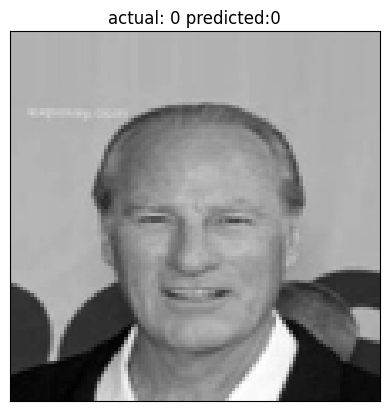

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


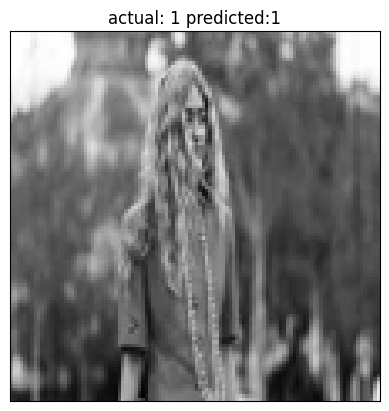

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


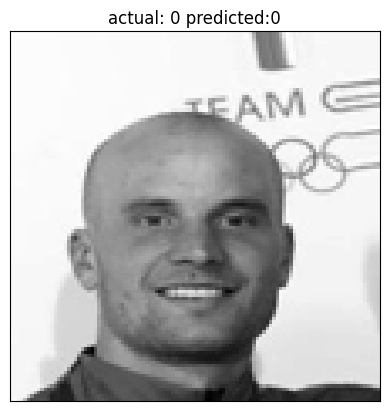

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


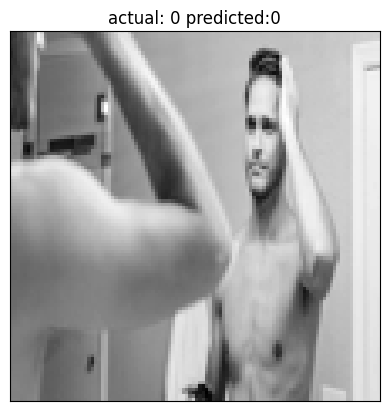

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


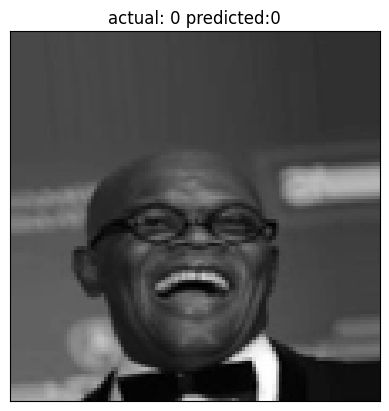

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


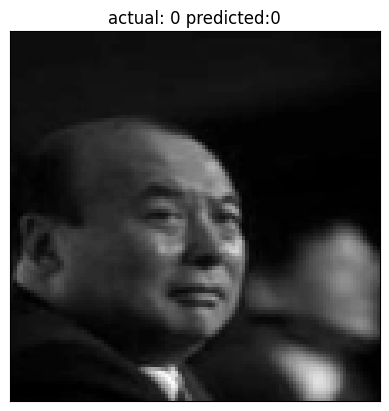

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


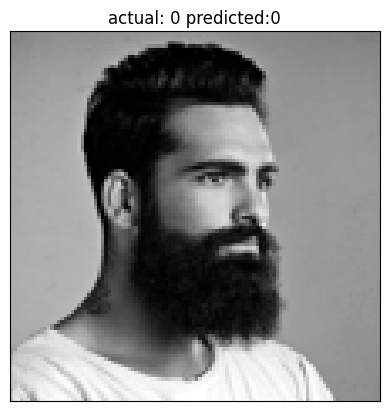

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


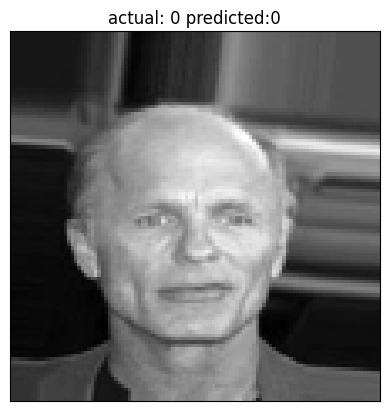

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


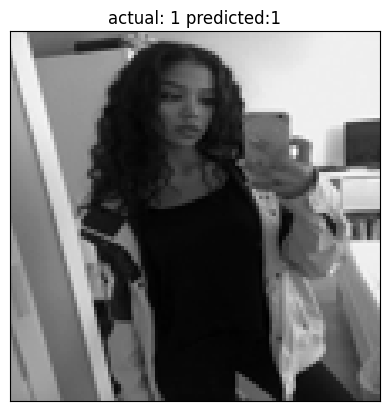

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


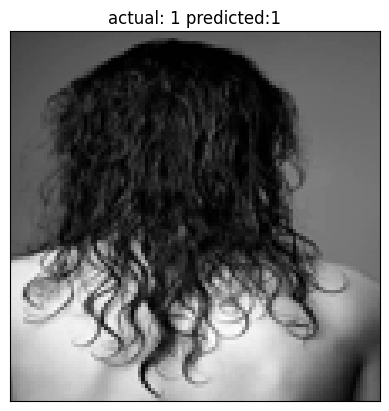

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


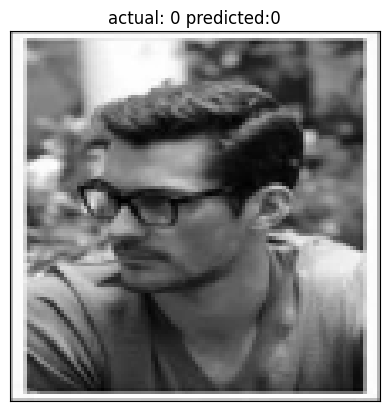

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


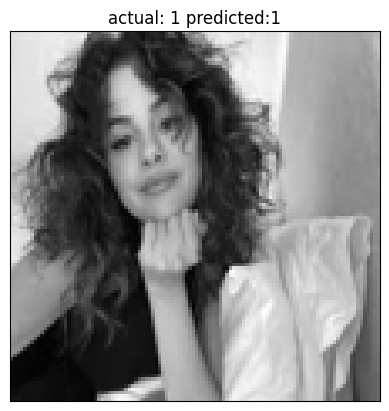

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


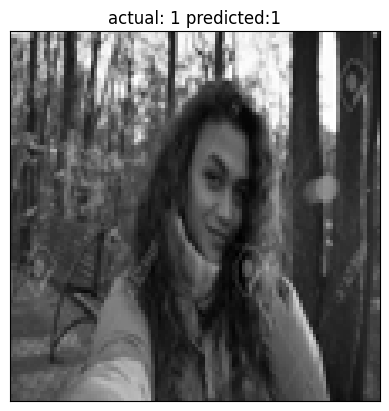

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


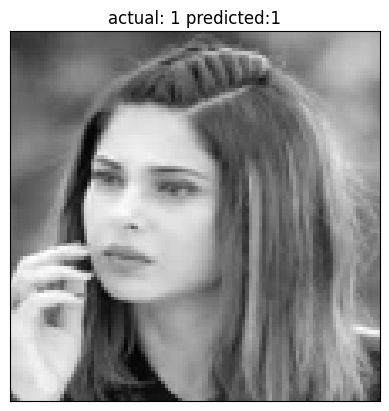

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


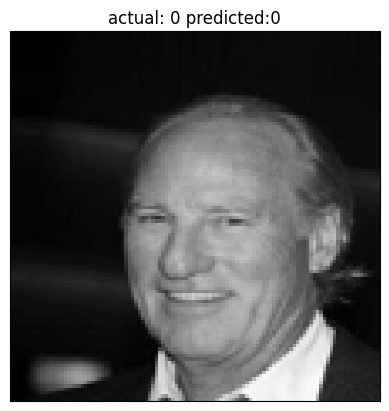

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


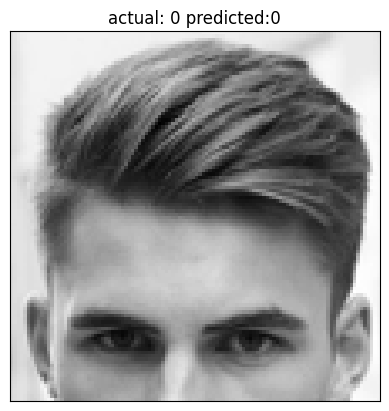

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


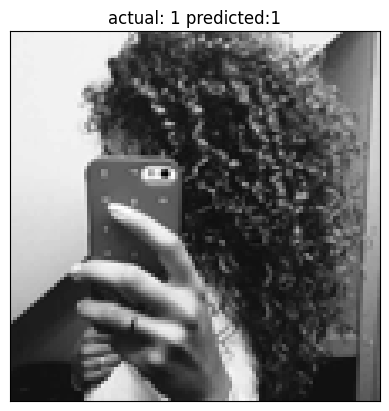

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


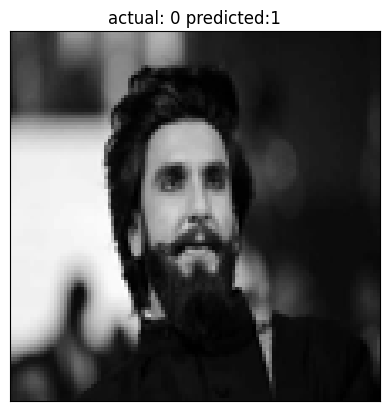

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


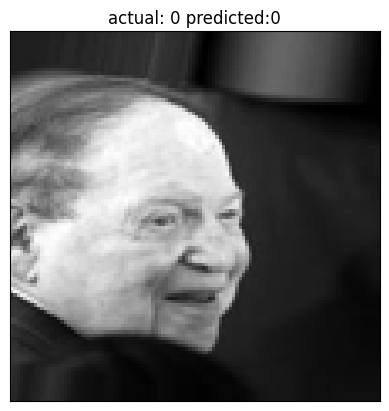

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


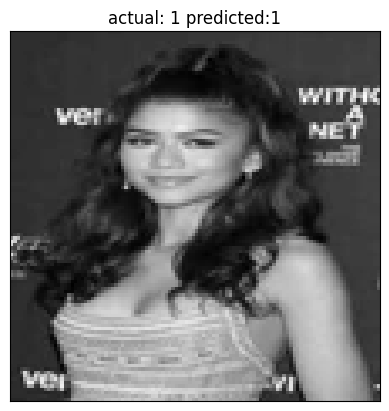

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


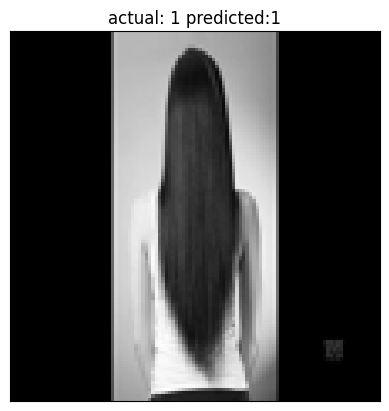

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


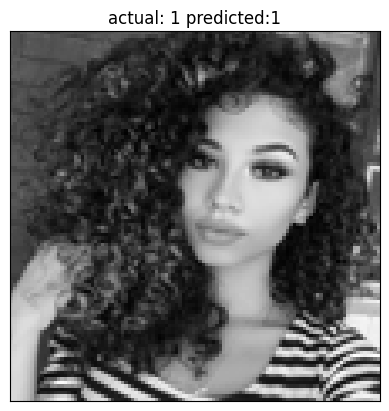

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


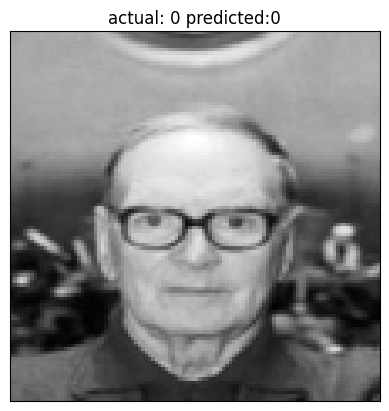

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


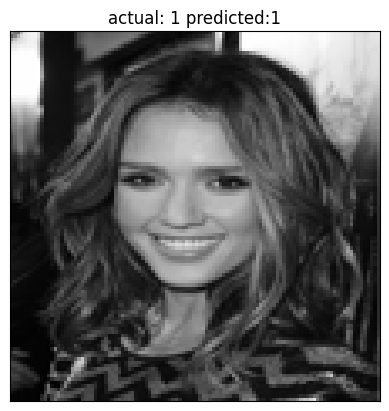

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


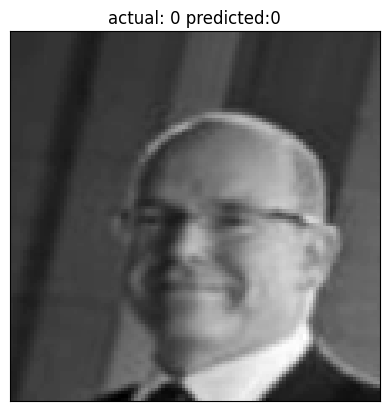

In [12]:
for i in range(25):
#     plt.subplot(2,5,i+1)
    plt.imshow(htest[i],cmap='gray')
    val =   hmodel.predict(np.expand_dims(htest[i],axis=0))
    plt.title(f'actual: {ltest[i]} predicted:{int(val[0][0]>0.5)}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

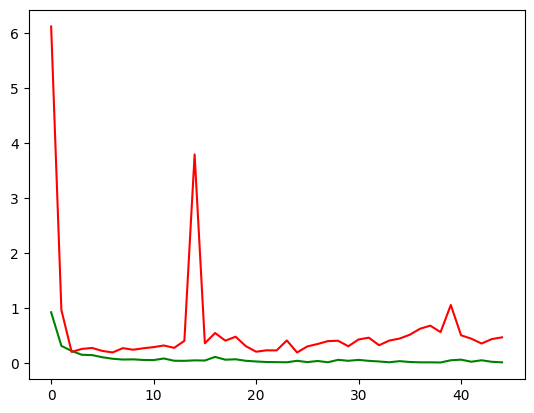

In [ ]:
history1 = history.history
loss = history1['loss']
val_loss = history1['val_loss']
plt.plot(loss,c='green')
plt.plot(val_loss,c='red')
plt.show() # plotting for visualize model perfromance